# Obtención de la constante de Hubble
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
%pylab inline
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st
import math
import random
plt.style.use('classic')

Populating the interactive namespace from numpy and matplotlib


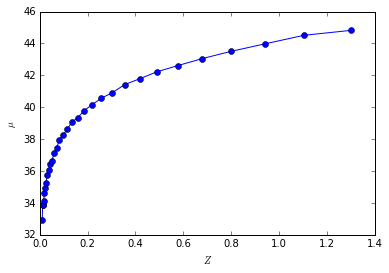

In [2]:
# Abrimos el arch. que contiene los datos 
f1=np.loadtxt('jla_mub_covmatrix.txt',delimiter = '\t',skiprows=0,usecols=[0,0]) 
f2=np.loadtxt('jla_mub.txt',delimiter = '\t',skiprows=0,usecols=[0,1]) 
covmatrix=f1[:,0]
z=f2[:,0]
mud=f2[:,1]
n=np.size(covmatrix) # Contabilizamos el número de datos que tenemos
plt.plot(z,mud,'bo', linestyle='-')
plt.xlabel("$Z$")
plt.ylabel("$\mu$")
plt.show()

In [3]:
cov=np.ones((31, 31))
for i in range(31):
    for j in range(31):
        cov[i][j]=covmatrix[i]
print(n)

961


In [4]:
var=np.zeros(31)
for i in range(31):
    var[i]=cov[i][i]

### Haciendo uso del logaritmo de la función maximizada de Likelihood

$-Ln(\mathfrak{L}(\vec{x},\vec{y}\mid \vec{\theta }))\propto \frac{1}{2}\sum_{i}^{n}\left ( \frac{y_{i}-\lambda (x_{i},\vec{\theta })}{\sigma_{i}^{2}} \right )$

In [5]:
def likelihood(H,om,z,y,var):
    n=np.size(var)
    c=3*10**8
    s3=(1.0-om)/om
    global arg
    arg=0.0
    lhood=np.zeros(n)
    for i in range(n):
        a=1/(1+z[i])
        eta1=(2.0*math.sqrt(s3+1)*((1**-4)-0.1540*(s3**1/3)*(1**-3)+0.4304*(s3**2/3)+0.19097*s3*1**-1+0.066941*(s3**4/3)))**(-1/8)
        eta2=(2.0*math.sqrt(s3+1)*((a**-4)-0.1540*(s3**1/3)*(a**-3)+0.4304*(s3**2/3)+0.19097*s3*a**-1+0.066941*(s3**4/3)))**(-1/8)
        D=(c/H)*(1+z[i])*(eta1-eta2)
        x= 25-5*math.log10(H/100.0)+5*math.log10(D)
        arg=arg+(y[i]-x)/(var[i])**2
        lhood[i]=arg/2.0
    return lhood[n-1]

Ingrese el número máx. de iteraciones
10000
('Interaciones:', 9999)
('Las soluciones son:', 77.01058576613829, 0.13005006668350894)


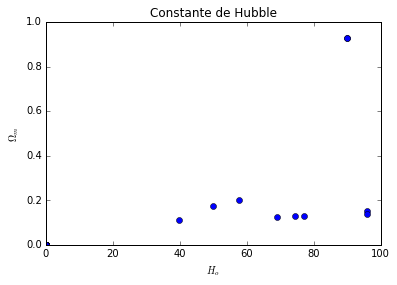

In [6]:
# Vectores iniciales del método iterativo
H0=random.uniform(1,100)
om0=random.uniform(1,10)/10.0
H1=random.uniform(41,100)
om1=random.uniform(1,10)/10.0
print("Ingrese el número máx. de iteraciones")
m=int(input())
sol1=np.zeros(m)
sol2=np.zeros(m)
pasos=np.zeros(m)
y0 = likelihood(H0,om0,z,mud,var)
y1 = likelihood(H1,om1,z,mud,var)
sol1[0]=H1
sol2[0]=om1
for i in range(1,m):
    pasos[i]=i
    err=abs(math.log10(abs(y1))-math.log10(abs(y0)))
    if(math.log10(abs(y1))<math.log10(abs(y0))):
        H0=H1
        om0=om1
        y0=likelihood(H0,om0,z,mud,var)
        sol1[i]=H0
        sol2[i]=om0
        H1=random.uniform(1,100)
        om1=random.uniform(1,10)/10.0
        y1 = likelihood(H1,om1,z,mud,var)
        if(err<1*10**-6):
            print('Las soluciones son:',H1,om1)
            plt.plot(sol1,sol2,'bo')
            plt.title("Constante de Hubble")
            plt.xlabel("$H_{o}$")
            plt.ylabel("$\Omega_{m}$")
            plt.autoscale()
            plt.show()
            break
        else:
            H1=random.uniform(1,100)
            om1=random.uniform(1,10)/10.0
            y1 = likelihood(H1,om1,z,mud,var)
    else:
        if(err<1*10**-6):
            print('Las soluciones son:',H1,om1)
            plt.plot(sol1,sol2,'bo')
            plt.title("Constante de Hubble")
            plt.xlabel("$H_{o}$")
            plt.ylabel("$\Omega_{m}$")
            plt.autoscale()
            plt.show()
            break
        else:
            H1=random.uniform(1,100)
            om1=random.uniform(1,10)/10.0
            y1 = likelihood(H1,om1,z,mud,var)
    if(i>(m-2)):
        print('Interaciones:',i)
        print('Las soluciones son:',H0,om0)
        plt.plot(sol1,sol2,'bo')
        plt.title("Constante de Hubble")
        plt.xlabel("$H_{o}$")
        plt.ylabel("$\Omega_{m}$")
        plt.autoscale()
        plt.show()
        break